In [2]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D

#### Esercizi svolti da Stefano Polo

#### Matricola: 940175

#### Struttura della cartella
Il seguente *notebook* legge delle immagini dalla cartella <span style="color:red"> Risultati</span>.

# <span style="color:green"> Numerical Simulation Laboratory </span>
## <span style="color:brown"> Python Exercise 11 </span>
## <span style="color:orange"> Keras - Neural Network regression </span>

### Exercise 11.1

Per risolvere l'esercizio ho fatto variare come parametri della rete neurale: il numero di epoche $N_{\mathrm{epochs}}$, il numero dei dati di *train* $N_{\mathrm{train}}$ e il rumore con cui venivano generati i dati $\sigma$. Facendo ciò ho visto come all'aumentare di $\sigma$ peggiorasse il fit eseguito dalla NN, mentre con l'incremento di $N_{\mathrm{train}}$ e $N_{\mathrm{epochs}}$ migliorava (tuttavia aumentando questo parametro si rischia un *overfitting* dei dati). Non riporto alcun risultato poichè è sono molto simili a quelli presentati come esempio nel *notebook* di testo.

### Exercise 11.2

La richiesta dell'esercizio consiste nel ottenere, mediante l'utilitzzo delle NNs, un buon fit del seguente polinomio di terzo grado:

$$
f(x)=4-3x-2x^2+3x^3 \quad \text{per} \quad x \in [-1,1]\, .
$$

Tale fit va cercato scegliendo in modo ragionevole i seguenti elementi:
- il numero di *layers* della NN;
- il numero di neuroni per ciascun *layer*;
- la funzione di attivazione;
- l'ottimizzatore;
- la *loss function*. 

#### Svolgimento dell'esercizio
Propongo alcune configurazioni di NNs che ho operato per risolvere il seguente esercizio con  $10^4$ dati di *train* pari e $10^3$ dati di *validation*. Come noterà il lettore, i primi tentativi consistevano in reti molto semplici, in modo da osservarne le capacità di apprendimento. Andando avanti con i test, ovviamente la "complessità" nelle strutture delle NNs è aumentata. Una caratteristica comune mantenuta per tutte le reti era la presenza di un neurone sul *layer* di input (scelta adottata poichè in entrata ho una variabile $x$) e di uno su quello di output (ho una variabile $f(x)$ in uscita). Il seguente elenco puntato cita i tentativi fatti:

- **Tentativo 1**: un *layer* denso nascosto contenente $N^{2}_{n} = 20$ neuroni. Tale scelta di $N_{n}$ è giustificata dal fatto che si vuole fittare un polinomio di grado 3, che presenta delle oscillazioni; dunque disporre di 20 neurone permette la realizzazione da parte della rete di tante funzioni caratteristiche. La funzione di attivazione per gli $N_{n}$ neuroni di questo *layer* è la "relu". Non ho assegnato alcuna funzione di attivazione al primo e ultimo *layer* (ciò per pulizia nell'entrata dell'input nel *layer* nascosto e in unscita). Come ottimizzatore ho scelto lo *stochastic gradient descent*, come *loss function* la *mse*, come misura della precisione la *mse* e $N_{epochs} = 40$. Il numero dei parametri di questa NN è di 63. Il risultato non è stato soddisfacente.

<img src="Risultati/Tentativo1.png" width="800">

- **Tentativo 2**: stesse carratteristiche del "Tentativo 1" ma con un numero di neuroni sul *layer* centrale $N_{n} = 60$ (numero di parametri NN: 183). Il risultato migliora visibilmente ma la rete non approssima bene per $x \in [0.5,1]$. Ho provato a aumentare $N_{epochs}$ fino a 60 ma non cambia il comportamento della NN.

<img src="Risultati/Tentativo2.png" width="800">

- **Tentativo 3**: stessi parametri del "Tentativo 2" ($N_{epochs} = 40$ e numero di parametri NN 183), ma ho cambiato la funzione di attivazione del *layer* centrale con la "tanh". Ho proceduto con questa scelta, perché, a differenza di "relu", la tangente iperbolica può assumere valori negativi. I risultati non sono ancora buoni (ma no soddisfacenti) e la variazione del numero dei neuroni non sembra avere effetti significativi.
<img src="Risultati/Tentativo3.png" width="800">

- **Tentativo 4**:  stessi parametri del "Tentativo 3" ma ho adottato *mae* come *loss function* e misura di precisione (numero di parametri NN: 183). Il risultato è peggiorato rispetto al caso precedente.
<img src="Risultati/Tentativo4.png" width="800">

- **Tentativo 5**: stessi parametri del "Tentativo 3" ma ho adottato *msle* come *loss function* e misura di precisione (numero di parametri NN: 183). Il risultato è pessimo. Tuttavia era prevedibile questo comportamento da parte della rete poiché la *mlse* è una *loss function* adatta al trattamento di problemi di classificazione.
<img src="Risultati/Tentativo5.png" width="800">

- **Tentativo 6**: stessi parametri del "Tentativo 3" ma ho adottato come ottimizzatore *Adadelta* (numero di parametri NN: 183). Il risultato è buono ma non perfetto (è migliorato notevolmente l'approssimazione per $x \in [0.5,1]$). 
<img src="Risultati/Tentativo6.png" width="800">

- **Tentativo 7**: dato che i risultati non miglioravano ho provveduto ad aggiungere un ulteriore *layer* da $N^{3}_{n} = 30$ (il *layer* precedente ne ha $N^{2}_{n} = 20$ con "tanh") con "relu". La *loss function* è la mse e come ottimizzatore ho scelto lo *stochastic gradient descent* ($N_{epochs} = 50$ numero di parametri NN: 703). Questa configurazione è quella che mi ha dato il risultato migliore per quanto riguarda l'approssimazione di $f(x)$. Propongo pertanto nelle celle seguenti il codice di questa configurazione.

In [103]:
# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 10000)
x_valid = np.random.uniform(-1, 1, 1000)
x_valid.sort()
y_target = 4.-3.*x_valid - 2*(x_valid**2)+3*(x_valid**3)

sigma = 0. # noise standard deviation, for the moment it is absent
y_train = np.random.normal(4.-3*x_train - 2*(x_train**2)+3*(x_train**3), sigma)
y_valid = np.random.normal(4.-3*x_valid - 2*(x_valid**2)+3*(x_valid**3), sigma)

In [97]:
model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))
model.add(Dense(20,activation='tanh'))
model.add(Dense(30, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_63 (Dense)             (None, 1)                 2         
_________________________________________________________________
dense_64 (Dense)             (None, 20)                40        
_________________________________________________________________
dense_65 (Dense)             (None, 30)                630       
_________________________________________________________________
dense_66 (Dense)             (None, 1)                 31        
Total params: 703
Trainable params: 703
Non-trainable params: 0
_________________________________________________________________


In [98]:
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=50,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Train on 10000 samples, validate on 1000 samples
Epoch 1/50
10000/10000 [==============================] - 2s 163us/step - loss: 0.6062 - mean_squared_error: 0.6062 - val_loss: 0.2363 - val_mean_squared_error: 0.2363
Epoch 2/50
10000/10000 [==============================] - 1s 74us/step - loss: 0.1270 - mean_squared_error: 0.1270 - val_loss: 0.0539 - val_mean_squared_error: 0.0539
Epoch 3/50
10000/10000 [==============================] - 1s 83us/step - loss: 0.0324 - mean_squared_error: 0.0324 - val_loss: 0.0169 - val_mean_squared_error: 0.0169
Epoch 4/50
10000/10000 [==============================] - 1s 79us/step - loss: 0.0137 - mean_squared_error: 0.0137 - val_loss: 0.0092 - val_mean_squared_error: 0.0092
Epoch 5/50
10000/10000 [==============================] - 1s 77us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.0060 - val_mean_squared_error: 0.0060
Epoch 6/50
10000/10000 [==============================] - 1s 85us/step - loss: 0.0057 - mean_squared_error: 0.0057 

Epoch 47/50
10000/10000 [==============================] - 1s 78us/step - loss: 4.7190e-04 - mean_squared_error: 4.7190e-04 - val_loss: 4.2858e-04 - val_mean_squared_error: 4.2858e-04
Epoch 48/50
10000/10000 [==============================] - 1s 74us/step - loss: 4.6226e-04 - mean_squared_error: 4.6226e-04 - val_loss: 4.2615e-04 - val_mean_squared_error: 4.2615e-04
Epoch 49/50
10000/10000 [==============================] - 1s 72us/step - loss: 4.5365e-04 - mean_squared_error: 4.5365e-04 - val_loss: 4.3299e-04 - val_mean_squared_error: 4.3299e-04
Epoch 50/50
10000/10000 [==============================] - 1s 75us/step - loss: 4.4149e-04 - mean_squared_error: 4.4149e-04 - val_loss: 4.5849e-04 - val_mean_squared_error: 4.5849e-04


In [99]:
# Valutazione del modello
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# stampo la performance
print()
print('Test loss del modello:', score[0])
print('Test accuracy del modello:', score[1])
print()
# valuto il modello con la curva esatta
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss con la curva esatta:', score[0])
print('Test accuracy con la curva esatta:', score[1])

1000/1000 [==============================] - 0s 51us/step

Test loss del modello: 0.0004584855944121955
Test accuracy del modello: 0.0004584855944121955

1000/1000 [==============================] - 0s 47us/step

Test loss con la curva esatta: 0.0004584855944121955
Test accuracy con la curva esatta: 0.0004584855944121955


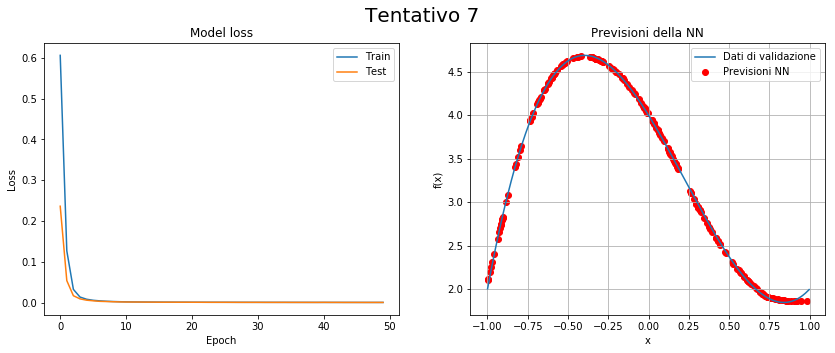

In [100]:
plt.figure(figsize=(14,5))
plt.suptitle('Tentativo 7',fontsize=20)
plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')

plt.subplot(1,2,2)
x_predicted = np.random.uniform(-1, 1, 200)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r',label = 'Previsioni NN')
plt.plot(x_valid, y_target, label = 'Dati di validazione')
plt.title('Previsioni della NN')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

Nella cella sottostante provo a prevedere la $f(x)$ con la mia NN fuori dai dati di *training*: Osservo che la rete da me costruita non è in grado di fare una previsione corretta del polinomio in esame.

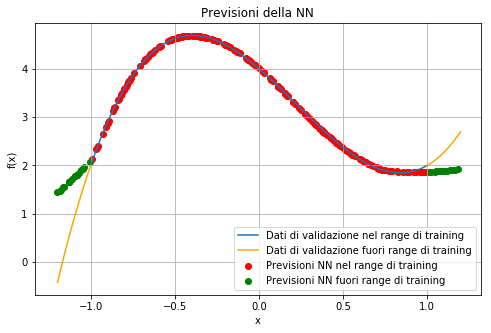

In [104]:
plt.figure(figsize=(8,5))
x_predicted = np.random.uniform(-1, 1, 200)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r',label = 'Previsioni NN nel range di training')
plt.plot(x_valid, y_target, label = 'Dati di validazione nel range di training')
x_predicted = np.random.uniform(-1.2, -1, 20) #provo a fare previsioni fuori dal range di training a sx
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='green',label = 'Previsioni NN fuori range di training')
x_valid = np.random.uniform(-1.2, -1, 100)
x_valid.sort()
y_target = 4.-3.*x_valid - 2*(x_valid**2)+3*(x_valid**3)
plt.plot(x_valid, y_target, color = "orange",label = 'Dati di validazione fuori range di training')
x_predicted = np.random.uniform(1, 1.2, 20) #provo a fare previsioni fuori dal range di training a dx
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='green')
x_valid = np.random.uniform(1, 1.2, 100)
x_valid.sort()
y_target = 4.-3.*x_valid - 2*(x_valid**2)+3*(x_valid**3)
plt.plot(x_valid, y_target, color = "orange")
plt.title('Previsioni della NN')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)

### Exercise 11.3

La richiesta dell'esercizio consiste nel ottenere, mediante l'utilitzzo delle NNs, un buon fit della seguente funzione trigonometrica 2D: 

$$
f(x,y) = \sin(x^2+y^2) \quad \text{per} \quad x \in [-3/2,3/2] \quad \text{e} \quad  y \in [-3/2,3/2]\, .
$$


Per risolvere questo esercizio ho costruito una rete neurale che opera con $10^4$ dati di *training* $(x,y)$ e $10^3$ dati di validazione. La rete di struttura nella seguente maniera:

- I *layer* di input con 2 neuroni (ho dati di input x e y) senza funzione di attivazione;
- II *layer* da 50 neuroni con funzione di attivazione "tanh";
- III *layer* da 50 neuroni con funzione di attivazione "relu";
- IV *layer* da 10 neuroni con funzione di attivazione "relu";
- V *layer* di output da 1 neurone (ho un valore di uscita $f(x)$) senza funzione di attivazione;
- *mse* come *loss function* e misura;
- *sgd* come metodo di ottimizzazione;
- $N_{epochs} = 50$.

Il numero totale di parametri della rete è di 3227

In [105]:
def sin2d(x): #implemento la funzione a due variabili
    return np.sin(x[:,0]**2+x[:,1]**2)

In [106]:
n_train = 10000 #numero dati di training
n_valid = 1000  #numero dati di validation

x_train = np.zeros((n_train, 2))    #matrice (x,y)
z_train = np.zeros((n_train, 1))  #vettore degli z

x_valid = np.zeros((n_valid, 2))
z_valid = np.zeros((n_valid, 1))

x_train[:,0] = np.random.uniform(-3./2., 3./2., n_train)
x_train[:,1] = np.random.uniform(-3./2., 3./2., n_train)

x_valid[:,0] = np.random.uniform(-3./2., 3./2., n_valid)
x_valid[:,1] = np.random.uniform(-3./2., 3./2., n_valid)

z_target= sin2d(x_valid)

sigma = 0.1
z_train = np.random.normal(sin2d(x_train), sigma)
z_valid = np.random.normal(sin2d(x_valid), sigma)

In [107]:
model = tf.keras.Sequential()
model.add(Dense(2, input_shape=(2,)))   #in entrata ci sono due nodi perchè ho una funzione a due variabili
model.add(Dense(50,activation='tanh'))
model.add(Dense(50,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_67 (Dense)             (None, 2)                 6         
_________________________________________________________________
dense_68 (Dense)             (None, 50)                150       
_________________________________________________________________
dense_69 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_70 (Dense)             (None, 10)                510       
_________________________________________________________________
dense_71 (Dense)             (None, 1)                 11        
Total params: 3,227
Trainable params: 3,227
Non-trainable params: 0
_________________________________________________________________


In [108]:
history = model.fit(x=x_train, y=z_train, 
          batch_size=32, epochs=50,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, z_valid))

Train on 10000 samples, validate on 1000 samples
Epoch 1/50
10000/10000 [==============================] - 2s 203us/step - loss: 0.1600 - mean_squared_error: 0.1600 - val_loss: 0.1552 - val_mean_squared_error: 0.1552
Epoch 2/50
10000/10000 [==============================] - 1s 91us/step - loss: 0.1341 - mean_squared_error: 0.1341 - val_loss: 0.1456 - val_mean_squared_error: 0.1456
Epoch 3/50
10000/10000 [==============================] - 1s 121us/step - loss: 0.1250 - mean_squared_error: 0.1250 - val_loss: 0.1371 - val_mean_squared_error: 0.1371
Epoch 4/50
10000/10000 [==============================] - 1s 124us/step - loss: 0.1163 - mean_squared_error: 0.1163 - val_loss: 0.1248 - val_mean_squared_error: 0.1248
Epoch 5/50
10000/10000 [==============================] - 1s 90us/step - loss: 0.1071 - mean_squared_error: 0.1071 - val_loss: 0.1163 - val_mean_squared_error: 0.1163
Epoch 6/50
10000/10000 [==============================] - 1s 90us/step - loss: 0.0982 - mean_squared_error: 0.098

In [109]:
# Valutazione del modello
score = model.evaluate(x_valid, z_valid, batch_size=32, verbose=1)

# stampo la performance
print()
print('Test loss del modello:', score[0])
print('Test accuracy del modello:', score[1])
print()
# valuto il modello con la curva esatta
score = model.evaluate(x_valid, z_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss con la curva esatta:', score[0])
print('Test accuracy con la curva esatta:', score[1])

1000/1000 [==============================] - 0s 84us/step

Test loss del modello: 0.012479182332754135
Test accuracy del modello: 0.012479182332754135

1000/1000 [==============================] - 0s 73us/step

Test loss con la curva esatta: 0.0017266517975367606
Test accuracy con la curva esatta: 0.0017266517975367606


In [110]:
n_predicted = 1000
x_predicted = np.zeros((n_predicted, 2))    #matrice (x,y)
z_predicted = np.zeros((n_predicted))
x_predicted[:,0] = np.random.uniform(-4./2., 4./2., n_predicted)
x_predicted[:,1] = np.random.uniform(-4./2., 4./2., n_predicted)
z_predicted= model.predict(x_predicted)

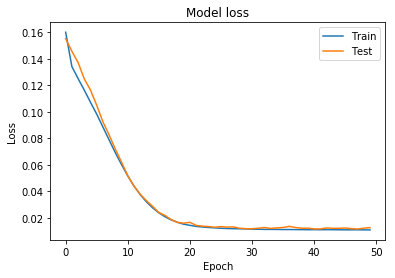

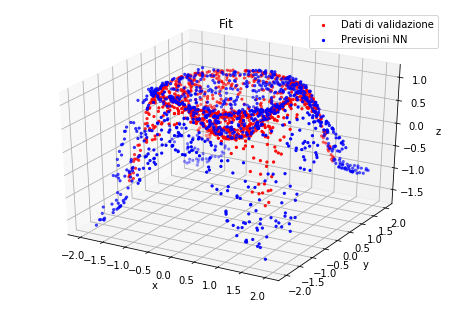

In [112]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x_valid[:,0], x_valid[:,1],z_target, c='red', marker='.',label = 'Dati di validazione')
ax.scatter(x_predicted[:,0], x_predicted[:,1],z_predicted, c='blue', marker='.',label = 'Previsioni NN')
plt.title('Previsioni NN')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.legend()
#ax.view_init(10, 30)
plt.show()

In questo caso la NN costruita sembra di essere in grado di prevedere approssimativamente l'andamento di $f(x)$ anche fuori dal range di training ossia per $x\in[-4/2,-3/2]\cup x\in[3/2,4/2]$ e $y\in[-4/2,-3/2]\cup y\in[3/2,4/2]$